### Metadata

**Main Paper:** https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3914352/

**Possible extra measure to apply:** https://arxiv.org/pdf/1904.05060.pdf

**Data**
- Interologous Interaction Database (i2d) --> For protein interactions
    - http://ophid.utoronto.ca/ophidv2.204/

**Neurodegenerative diseases**    
- Huntington's disease (HD)
- Prion (P)
- Frontotemporal dementia (FTD)
- Alzheimer's disease (AD)
- Friedreich's ataxia (FA)
- Lewy body disease (LBD)
- Parkinson's disease (PD)
- Amyotrophic lateral sclerosis (ALS)
- Spinal muscular atrophy (SMA)
- Extra: Glioblastoma multiforme (GBM)

**Steps**
- From the list of disease proteins in the Excel file, get the first-degree neighbors of each protein and store them. (Use the i2d dataset for this) || **CHECK**
- Build the network from the list of disease proteins and their neighbors **CHECK**
- Calculate centrality measures for every node, retrieve the ones from the disease proteins **CHECK**
- Attempt new centrality measure calculation. 
- Explore relationship of disease proteins to the global central nodes in the network
    
**Relevant stuff**
- Type of interaction network: undirected and weighted
- Only first degree neighbors taken in acccount

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd

### Analysis of the proteins that interact with each other

In [2]:
disease_proteins = pd.read_excel("/Users/dafirebanks/Documents/Spring_2019/ComplexNets/Networks_FinalProject/Supplementary_materials_paper/Suppl1_DiseaseProteins_Diseases.xlsx",sheet_name="Sheet2")

In [3]:
all_proteins = pd.read_csv("/Users/dafirebanks/Downloads/i2d.2_9.Public.HUMAN.tab 2", sep='\t')

In [4]:
# All proteins database
all_proteins.head(10)

,Dataset,SwissProt1,SwissProt2
0,SOURAV_MAPK_LOW,P63000,A0AUZ9
1,IntAct,Q96CV9,A0AUZ9
2,BioGrid,P0CG48,A0AV96
3,IntAct_Mouse,P62258,A0AV96
4,IntAct_Mouse,P63104,A0AV96
5,BioGrid,Q15717,A0AV96
6,IntAct,Q92731,A0AV96
7,BioGrid,Q99496,A0AV96
8,INNATEDB,Q99496,A0AV96
9,IntAct_Mouse,Q9H2F3,A0AV96


In [5]:
# Disease proteins sample
disease_proteins.head(10)

,Disease Protein,Disease,Note
0,P04156,HD,NaN
1,P20226,HD,NaN
2,Q8WXH2,HD,NaN
3,P42858,HD,NaN
4,P04156,P,NaN
5,Q13148,FTD,NaN
6,P28799,FTD,NaN
7,P49768,FTD,NaN
8,P10636,FTD,NaN
9,P37840,FTD,NaN


In [6]:
# Remove unnecessary column
all_proteins = all_proteins.drop(columns=["Dataset"])

In [7]:
# Get a reference list of proteins to use for filtering
d_prots = list(disease_proteins["Disease Protein"])

In [8]:
# Select only the rows that contain proteins in the d_prots list
filtered_proteins = all_proteins[all_proteins["SwissProt1"].isin(d_prots)]
filtered_proteins1 = all_proteins[all_proteins["SwissProt2"].isin(d_prots)]

In [9]:
# Combine the dataframes 
df = pd.concat([filtered_proteins, filtered_proteins1])

In [10]:
# Final network, includes first neighbors that go both ways [other prot <- disease prot and other prot -> disease prot]
df.head(10)

,SwissProt1,SwissProt2
89,Q5S007,A0JLT9
418,Q9UGJ0,A4D0S4
524,Q5S007,A4UGR9
848,P35637,A6NIV6
1046,P04626,A8K1F4
1165,Q9UGJ0,A8K9T9
1246,P37231,A9UHW6
1426,P22314,B4DEE8
1457,P09936,B4DRS2
1520,Q99497,B4E1C1


In [11]:
df.shape

(10584, 2)

In [36]:
df.to_csv("/Users/dafirebanks/Documents/Reduced_network.csv")

In [12]:
g = nx.from_pandas_edgelist(df, "SwissProt1", "SwissProt2")

In [13]:
# Get basic centrality measures on a list
clust_coef = nx.average_clustering(g)
deg_centr = nx.degree_centrality(g)
eigen_centr = nx.eigenvector_centrality(g)
close_centr = nx.closeness_centrality(g)
bet_centr = nx.betweenness_centrality(g)

In [14]:
# Get normal statistics: Min degree, max degree, density
n_degrees = [g.degree(n) for n in list(g.nodes())]
avg_deg = sum(n_degrees)/len(n_degrees)
min_degree = min(n_degrees)
max_degree = max(n_degrees)
density = nx.density(g)
print(min_degree, max_degree, density, avg_deg)

1 731 0.000985494099146911 3.702501330494944


In [15]:
len(g.nodes()), len(g.edges())

(3758, 6957)

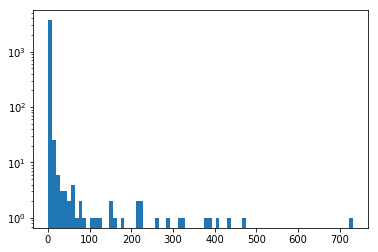

In [16]:
# Degree distribution
# plt.xscale("log")
_ = plt.hist(n_degrees, bins=80, log=True)

In [17]:
# Sort all of them
deg_sort = sorted(deg_centr.items(), key=lambda kv: kv[1], reverse=True)
eigen_sort = sorted(eigen_centr.items(), key=lambda kv: kv[1], reverse=True)
close_sort = sorted(close_centr.items(), key=lambda kv: kv[1], reverse=True)
bet_sort = sorted(bet_centr.items(), key=lambda kv: kv[1], reverse=True)

In [18]:
# Get the five highest of each
deg_3 = deg_sort[:5]
eigen_3 = eigen_sort[:5]
close_3 = close_sort[:5]
bet_3 = bet_sort[:5]

In [19]:
print(f"Clustering coefficient: {clust_coef}")
print(f"Degree centrality: {deg_3}")
print(f"Eigenvector centrality: {eigen_3}")
print(f"Closeness centrality: {close_3}")
print(f"Betweenness centrality: {bet_3}")

Clustering coefficient: 0.10832732338054178
Degree centrality: [('P55072', 0.19457013574660634), ('Q5S007', 0.12509981368112857), ('Q9UGJ0', 0.11658237955815812), ('O60260', 0.1085972850678733), ('P35637', 0.10300771892467395)]
Eigenvector centrality: [('P55072', 0.41714284355239795), ('O60260', 0.24449591048089625), ('P35637', 0.227438898019333), ('Q9UGJ0', 0.22572136395720166), ('Q5S007', 0.20969172032443625)]
Closeness centrality: [('P0CG48', 0.4801891615541922), ('P55072', 0.4354427445526194), ('O60260', 0.4239449334236064), ('P11142', 0.4181878895814782), ('P35637', 0.41449691085613416)]
Betweenness centrality: [('P55072', 0.2439436762010628), ('Q5S007', 0.13384961379948968), ('P42858', 0.13009929248596527), ('O60260', 0.11508999722414018), ('Q9UGJ0', 0.10608876696331074)]


In [39]:
g.degree("P55072")

731

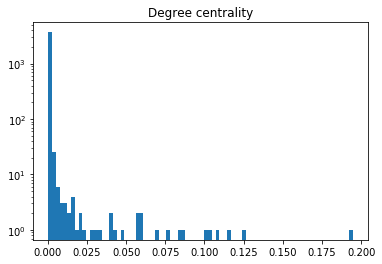

In [24]:
plt.title("Degree centrality")
_ = plt.hist(deg_centr.values(), bins=80, log=True)

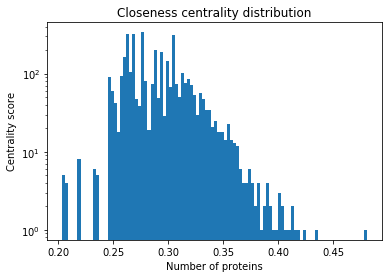

In [30]:
plt.title("Closeness centrality distribution")
plt.xlabel("Number of proteins")
plt.ylabel("Centrality score")
_ = plt.hist(close_centr.values(), bins=100, log=True)

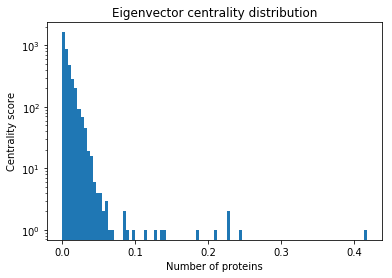

In [31]:
plt.title("Eigenvector centrality distribution")
plt.xlabel("Number of proteins")
plt.ylabel("Centrality score")
_ = plt.hist(eigen_centr.values(), bins=100, log=True)

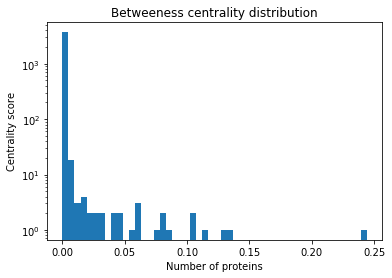

In [34]:
plt.title("Betweeness centrality distribution")
plt.xlabel("Number of proteins")
plt.ylabel("Centrality score")
_ = plt.hist(bet_centr.values(), bins=50, log=True)

In [23]:
all_cent = [deg_3, eigen_3, close_3, bet_3]

In [22]:
# Check which of the disease proteins are 
central_dprots = set()
central_nprots = set()
for cent in all_cent:
    for (prot, score) in cent:
        if prot in d_prots:
#             print(prot)
            central_dprots.add(prot)
        else:
            central_nprots.add(prot)

In [173]:
len(central_dprots), len(central_nprots)

(6, 2)

In [148]:
central_dprots, central_nprots

({'O60260', 'P35637', 'P42858', 'P55072', 'Q5S007', 'Q9UGJ0'}, {'P0CG48'})

In [142]:
# Get rows with central disease proteins from disease_proteions
disease_proteins[disease_proteins["Disease Protein"].isin(central_dprots)]

,Disease Protein,Disease,Note
3,P42858,HD,NaN
10,P55072,FTD,NaN
27,P35637,ALS,NaN
54,O60260,PD,NaN
55,Q9UGJ0,PD,have no interaction
62,Q5S007,PD,NaN


In [149]:
g.degree("Q9UGJ0")

438

In [25]:
indegree_map = {node:0 for node in g.nodes()}
for source,target in g.edges():
    indegree_map[target] += 1

In [120]:
outdegree_map = {node:0 for node in g.nodes()}
for source,target in g.edges():
    outdegree_map[source] += 1

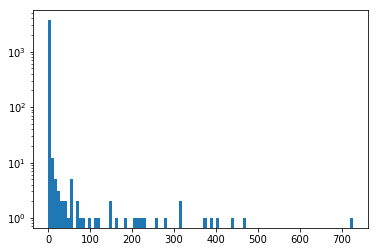

In [121]:
_ = plt.hist(outdegree_map.values(), bins=100, log=True)

In [52]:
bro = 0
count = 0 

for element in second_neighbors[1]:
    count += 1
    print(element)
    

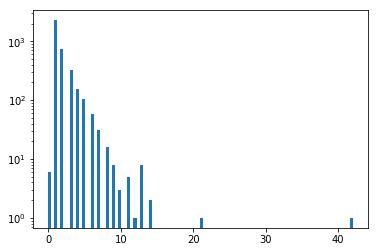

In [118]:
_ = plt.hist(indegree_map.values(), bins=100, log=True)